In [3]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np

sns.set_style('darkgrid')

df_orders = pd.read_excel('orders.xlsx')
df_products = pd.read_excel('products.xlsx')

In [4]:
df_orders

,order_id,accepted_at,product_id,quantity,regular_price,price,cost_price
0,1517514900,2022-01-13 16:48:19,17122,1,169,169,74
1,1517430051,2022-01-13 16:46:53,17122,1,169,169,74
2,1517578174,2022-01-13 18:12:30,17122,1,169,169,74
3,1517466327,2022-01-13 15:11:12,22199,1,219,219,130
4,1517429157,2022-01-13 19:15:59,22199,1,219,219,130
...,...,...,...,...,...,...,...
3318,1517405750,2022-01-13 19:29:44,79337,2,105,105,54
3319,1517676281,2022-01-13 08:21:53,79337,1,105,105,54
3320,1517545392,2022-01-13 13:16:21,11897,1,513,513,392
3321,1517658904,2022-01-13 08:50:25,6392,2,79,79,45


In [5]:
# level1 -- product category
# level2 -- product sub category
df_products

,product_id,level1,level2,name
0,1,Гигиена,Бритье,Кассеты для бритья Gillette Fusion ProGlide Po...
1,2,Мучные кондитерские изделия,Мучные кондитерские изделия,Печенье Бодрость
2,3,Мясная гастрономия,"Сосиски, сардельки",Сосиски Стародворье
3,4,Чай,Черный чай,Чай Азерчай
4,5,Безалкогольные напитки,Соковая продукция,Морс Valio
...,...,...,...,...
40147,112937,Безалкогольные напитки,Напитки,Напиток Venom
40148,112997,Бакалея,Пряности,Приправа Adjika Family
40149,113057,Бакалея,Пряности,Соль Кулина
40150,113117,Кулинария,Готовые блюда,Салат Хлеб Насущный


In [6]:
# which category sold the most items?

In [7]:
# finding how much each product_id was sold
df_products_sold_amnt = df_orders.groupby(['product_id'], as_index=False).agg({'quantity': 'sum'})
# merging two dfs on product_id
df_report = df_products_sold_amnt.merge(df_products, on='product_id')

In [8]:
# grouping df by category level 1
df_report_1 = df_report.groupby(['level1'], as_index=False).agg({'quantity': 'sum'})
# optional sorting
df_report_1 = df_report_1.sort_values('quantity', ascending=False)

In [9]:
df_report_1['level1'] = df_report_1['level1'].astype(str)
df_report_1

,level1,quantity
1,Безалкогольные напитки,534
11,Молочная продукция,483
19,Свежие овощи,262
10,Кулинария,250
0,Бакалея,239
25,Хлеб и хлебобулочные изделия,218
21,Снэки,212
20,Свежие фрукты,184
6,Замороженная продукция,175
7,Кондитерские изделия,138


In [10]:
# want to make labels more readable, so replacing second space with \n
import re

df_report_1['level1'] = df_report_1['level1'].apply(lambda x: re.sub(r"^([^ ]+ [^ ]+)( )", r"\1\n", x))

Text(0.5, 0, 'Category')

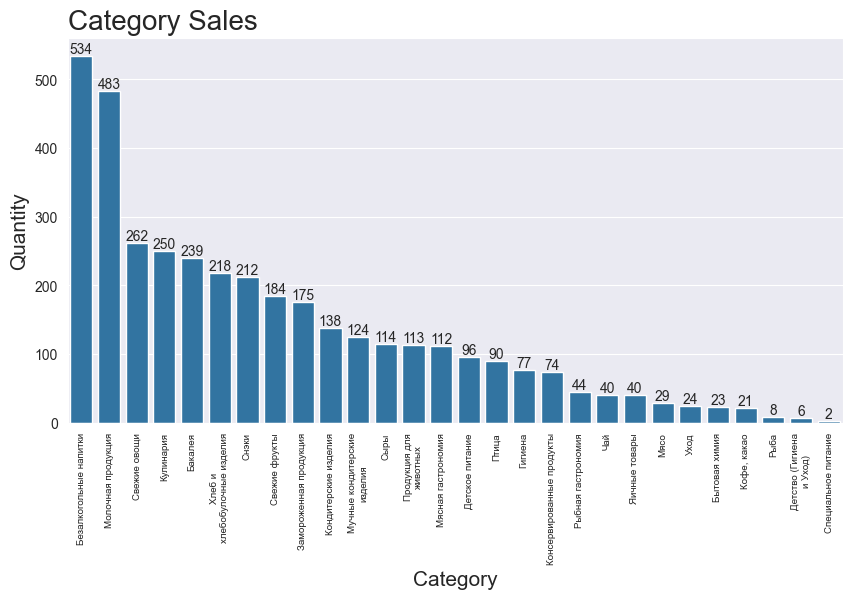

In [11]:
plt.figure(figsize=(10, 5))


ax = sns.barplot(df_report_1, x='level1', y='quantity')
plt.bar_label(ax.containers[0])
plt.xticks(rotation=90, ha='center', size=7)
plt.title('Category Sales', size=20, loc='left')
plt.ylabel('Quantity', size=15)
plt.xlabel('Category', size=15)

In [12]:
# estimate the distribution of the number of items sold 
# in each product category (level 1) by subcategories (level 2)

In [13]:
df_report_2 = df_report.groupby(['level1', 'level2'], as_index=False).agg({'quantity': 'sum'})
df_report_2 = df_report_2.sort_values('quantity', ascending=False)
df_report_2.head(5)

,level1,level2,quantity
13,Безалкогольные напитки,Напитки,252
54,Кулинария,Готовые блюда,248
95,Хлеб и хлебобулочные изделия,Хлеб и хлебобулочные изделия,218
86,Снэки,Снэки соленые,180
12,Безалкогольные напитки,Воды питьевые,162


In [14]:
# find avarage check on 13.01.2022

In [15]:
df_report_3 = df_orders.drop(['regular_price', 'cost_price'], axis=1)
(df_report_3['accepted_at'].dt.day).unique() # this is data only for 13.01.2022
df_report_3['order_id'].is_unique # false

df_report_3 = df_report_3.groupby(['order_id']).agg({'accepted_at': 'unique', 'price': 'sum'})
round(float(df_report_3['price'].mean()), 2)

798.04

In [16]:
# Calculate the share of products in the "Cheese" category that are sold under the promotion
# make pie chart

In [17]:
# making df with only 'Cheese' category
df_cheese = df_products[df_products['level1'] == 'Сыры']
# merging dfs to have prices
df_cheese = df_cheese.merge(df_orders, on='product_id')
# making column with promo/no_promo value
df_cheese['is_promo'] = (df_cheese['price'] != df_cheese['regular_price'])
# calculating share
(float(df_cheese[df_cheese['is_promo'] == True]['is_promo'].count()/df_cheese['is_promo'].count()))*100

32.075471698113205

In [18]:
df_cheese.columns

Index(['product_id', 'level1', 'level2', 'name', 'order_id', 'accepted_at',
       'quantity', 'regular_price', 'price', 'cost_price', 'is_promo'],
      dtype='object')

Text(0.0, 1.0, 'Share of promo items')

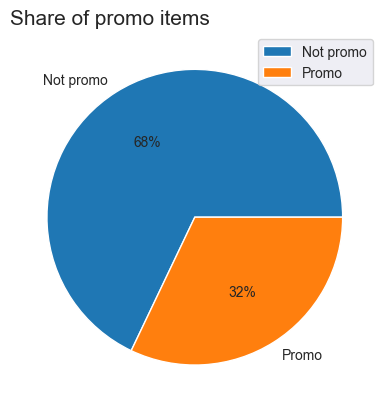

In [19]:
df_cheese_pie = df_cheese[['level1', 'is_promo']]
df_cheese_pie = df_cheese_pie.groupby(['is_promo']).agg({'level1': 'count'})
df_cheese_pie.plot.pie(y='level1', labels=['Not promo', 'Promo'], autopct='%1.0f%%')
plt.ylabel('')
plt.title('Share of promo items', size=15, loc='left')

In [20]:
# find margin by all level1 categories in money and in % 

In [21]:
df_merged = df_orders.merge(df_products, on='product_id')

In [22]:
df_merged.head()

,order_id,accepted_at,product_id,quantity,regular_price,price,cost_price,level1,level2,name
0,1517514900,2022-01-13 16:48:19,17122,1,169,169,74,Рыбная гастрономия,Нерыбные продукты моря,Крабовые палочки Меридиан
1,1517430051,2022-01-13 16:46:53,17122,1,169,169,74,Рыбная гастрономия,Нерыбные продукты моря,Крабовые палочки Меридиан
2,1517578174,2022-01-13 18:12:30,17122,1,169,169,74,Рыбная гастрономия,Нерыбные продукты моря,Крабовые палочки Меридиан
3,1517466327,2022-01-13 15:11:12,22199,1,219,219,130,Сыры,Мягкие сыры,Сыр Самокат
4,1517429157,2022-01-13 19:15:59,22199,1,219,219,130,Сыры,Мягкие сыры,Сыр Самокат


In [23]:
df_margin_lvl1 = df_merged.groupby(['level1'], as_index=False).agg({'price': 'sum', 'cost_price':'sum'})
df_margin_lvl1['margin_money'] = df_margin_lvl1['price'] - df_margin_lvl1['cost_price']
df_margin_lvl1['margin_pct'] = round(((df_margin_lvl1['margin_money']/df_margin_lvl1['price']) * 100), 2)
df_margin_lvl1

,level1,price,cost_price,margin_money,margin_pct
0,Бакалея,18829,11605,7224,38.37
1,Безалкогольные напитки,34220,19057,15163,44.31
2,Бытовая химия,5435,4015,1420,26.13
3,Гигиена,9214,6510,2704,29.35
4,Детское питание,3435,2163,1272,37.03
5,Детство (Гигиена и Уход),1729,1212,517,29.90
6,Замороженная продукция,23315,12258,11057,47.42
7,Кондитерские изделия,11604,6694,4910,42.31
8,Консервированные продукты,8648,5013,3635,42.03
9,"Кофе, какао",6928,3399,3529,50.94


[Text(0.5, 0, 'Margin in money'), Text(0, 0.5, 'Category')]

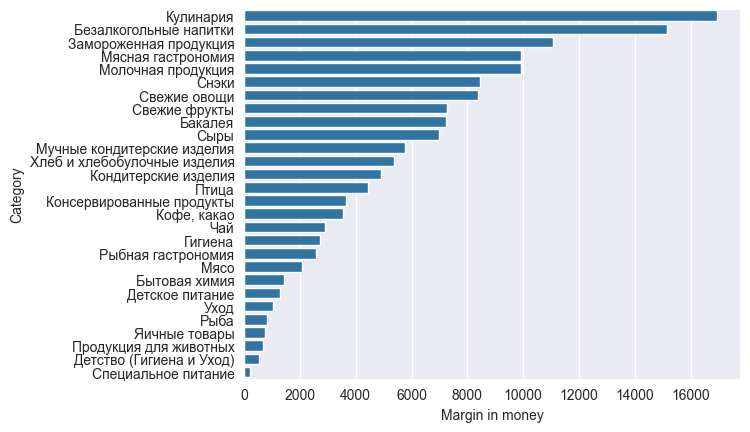

In [24]:
df_plot_m = df_margin_lvl1.sort_values('margin_money', ascending=False).drop(['price', 'cost_price'], axis=1)
ax = sns.barplot(df_plot_m, x='margin_money', y='level1', orient='y')
ax.set(xlabel='Margin in money', ylabel='Category')

[Text(0.5, 0, 'Margin (%)'), Text(0, 0.5, 'Category')]

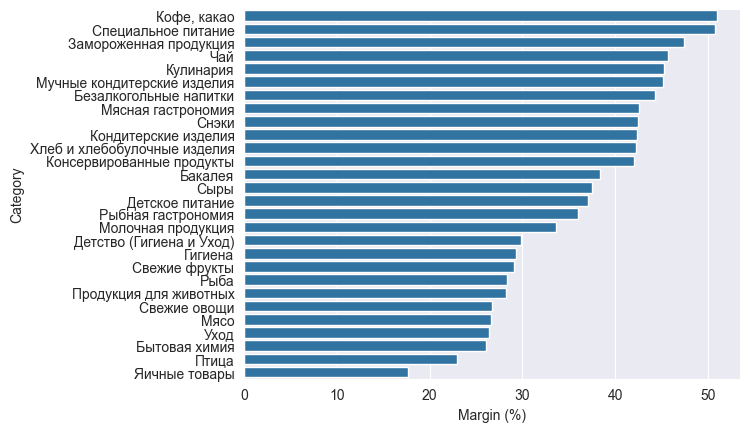

In [25]:
df_plot_pct = df_margin_lvl1.sort_values('margin_pct', ascending=False).drop(['price', 'cost_price'], axis=1)
ax = sns.barplot(df_plot_pct, x='margin_pct', y='level1')
ax.set(xlabel='Margin (%)', ylabel='Category')

In [26]:
# make ABC analysis by amount of sales and revenue

In [28]:
df_merged.head()

,order_id,accepted_at,product_id,quantity,regular_price,price,cost_price,level1,level2,name
0,1517514900,2022-01-13 16:48:19,17122,1,169,169,74,Рыбная гастрономия,Нерыбные продукты моря,Крабовые палочки Меридиан
1,1517430051,2022-01-13 16:46:53,17122,1,169,169,74,Рыбная гастрономия,Нерыбные продукты моря,Крабовые палочки Меридиан
2,1517578174,2022-01-13 18:12:30,17122,1,169,169,74,Рыбная гастрономия,Нерыбные продукты моря,Крабовые палочки Меридиан
3,1517466327,2022-01-13 15:11:12,22199,1,219,219,130,Сыры,Мягкие сыры,Сыр Самокат
4,1517429157,2022-01-13 19:15:59,22199,1,219,219,130,Сыры,Мягкие сыры,Сыр Самокат


In [32]:
df_ABC = df_merged.groupby(['level2']).agg({'quantity':'sum', 'price':'sum'})
df_ABC['quant_share'] = df_ABC['quantity']/ sum(df_ABC['quantity'])
df_ABC['price_share'] = df_ABC['price']/ sum(df_ABC['price'])
df_ABC = df_ABC.sort_values('quant_share', ascending=False)
df_ABC['quant_cumsum'] = df_ABC['quant_share'].cumsum()
df_ABC['price_cumsum'] = df_ABC['price_share'].cumsum()
df_ABC

,quantity,price,quant_share,price_share,quant_cumsum,price_cumsum
level2,,,,,,
Напитки,252,18320,0.067524,0.047159,0.067524,0.047159
Готовые блюда,248,36944,0.066452,0.095100,0.133976,0.142258
Хлеб и хлебобулочные изделия,218,12722,0.058414,0.032748,0.192390,0.175007
Снэки соленые,180,15178,0.048232,0.039071,0.240622,0.214078
Воды питьевые,162,5807,0.043408,0.014948,0.284030,0.229026
...,...,...,...,...,...,...
Освежители воздуха,2,568,0.000536,0.001462,0.998392,0.996890
Готовая еда Самокат,2,484,0.000536,0.001246,0.998928,0.998136
Диетическое питание,2,410,0.000536,0.001055,0.999464,0.999192


In [35]:
df_ABC['ABC_quantity'] = np.where(df_ABC['quant_cumsum'] < 0.8, 'A', np.where(df_ABC['quant_cumsum'] < 0.95, 'B', 'C'))
df_ABC['ABC_price'] = np.where(df_ABC['price_cumsum'] < 0.8, 'A', np.where(df_ABC['price_cumsum'] < 0.95, 'B', 'C'))
df_abc_report = df_ABC.reset_index()[['level2', 'ABC_quantity', 'ABC_price']]

In [37]:
df_abc_report['ABC_grp'] = df_abc_report['ABC_quantity'] + df_abc_report['ABC_price']

In [46]:
df_abc_report

,level2,ABC_quantity,ABC_price,ABC_grp
0,Напитки,A,A,AA
1,Готовые блюда,A,A,AA
2,Хлеб и хлебобулочные изделия,A,A,AA
3,Снэки соленые,A,A,AA
4,Воды питьевые,A,A,AA
...,...,...,...,...
95,Освежители воздуха,C,C,CC
96,Готовая еда Самокат,C,C,CC
97,Диетическое питание,C,C,CC
98,Средства для сантехники,C,C,CC
